# Loading Regression Data

In [1]:
from sklearn.datasets import load_diabetes

df = load_diabetes(as_frame=True).frame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Split training and testing data here

In [2]:
from sklearn.model_selection import train_test_split

x = df.drop("target", axis=1)
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=False, random_state=0)
print(f"Length of train set and test set are respectively: {len(x_train)} and {len(x_test)} .")

Length of train set and test set are respectively: 353 and 89 .


# KNeighborsRegressor
## No feature scaling

fit knn regressor here without feature scaling

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score 

neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

### Get the mse and rsquared on the testing set with k=10

In [4]:
y_pred = neigh.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}, r2_score: {r2} .")

mse: 3308.41606741573, r2_score: 0.4848124304556761 .


### Find the k that gives the lowset mse for the problem. (Try k's from 1-40). Print best k found

In [8]:
import numpy as np

dict_mse = {}
for n in range(1,41):
    neigh = KNeighborsRegressor(n_neighbors=n).fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    dict_mse[n] = mse

min_mse_idx = np.argmin(list(dict_mse.values()))
print(f"The best K for minimum mse is: {min_mse_idx+1}, and it\'s value is {dict_mse[min_mse_idx+1]}")

The best K for minimum mse is: 20, and it's value is 3066.832106741573


### Plot testing set mse as k increases. Plot from k=1 to k=40 (y-axis: testing set mse, x-axis: k)

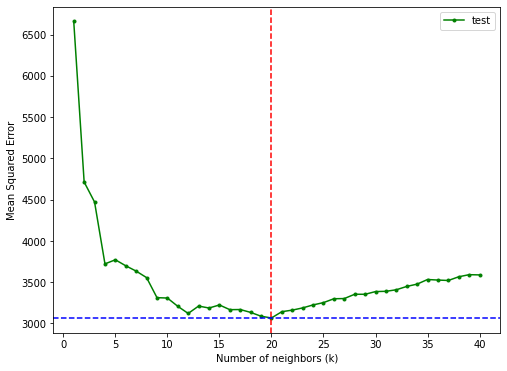

In [18]:
from cProfile import label
import matplotlib.pyplot as plt

xx = list(dict_mse.keys())
yy = list(dict_mse.values())

plt.figure(figsize=(8,6))
plt.plot(xx, yy, color='green', label="test", marker="o", markerfacecolor="green", markersize=3)
plt.axvline(x=min_mse_idx+1, color="red", linestyle="dashed")
plt.axhline(y=dict_mse[min_mse_idx+1], color="blue", linestyle="dashed")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

### Fit KnnRegressor with best k and get the mse and rsquared on testing set

In [19]:
neigh = KNeighborsRegressor(n_neighbors=min_mse_idx+1).fit(x_train, y_train) 
y_pred = neigh.predict(x_test) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The lowest mse is: {mse}, and its corresponding r2 score is:{r2}")

The lowest mse is: 3066.832106741573, and its corresponding r2 score is:0.5224319592587234


## Feature scaling

fit knn regressor here with feature scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)
x_train_scl = scaler.transform(x_train)
x_test_scl = scaler.transform(x_test)

neigh = KNeighborsRegressor(n_neighbors=10).fit(x_train_scl, y_train)
y_pred = neigh.predict(x_test_scl)

### Get the mse and rsquared on the testing set with k=10

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}, r2 score: {r2} .")

mse: 3203.093595505618, r2 score: 0.5012132782378461 .


### Find the k that gives the lowset mse for the problem. (Try k's from 1-40). Print best k found

In [22]:
dict_mse = {}
for n in range(1,41):
    neigh = KNeighborsRegressor(n_neighbors=n).fit(x_train_scl, y_train)
    y_pred = neigh.predict(x_test_scl)
    mse = mean_squared_error(y_test, y_pred)
    dict_mse[n] = mse

min_mse_idx = np.argmin(list(dict_mse.values()))
print(f"Key of the dictionary for minimum mse is: {min_mse_idx+1}, and it\'s value is {dict_mse[min_mse_idx+1]}")

Key of the dictionary for minimum mse is: 16, and it's value is 3069.5179511938204


### Plot testing set mse as k increases. Plot from k=1 to k=40 (y-axis: testing set mse, x-axis: k)

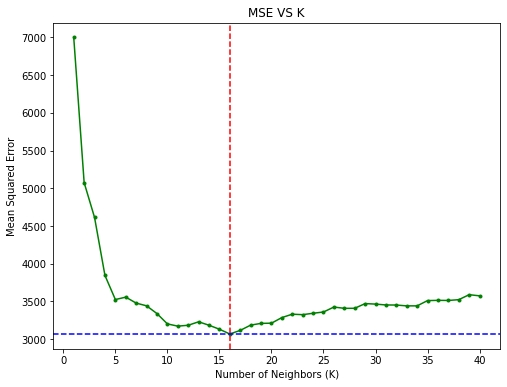

In [25]:
import matplotlib.pyplot as plt

xx = list(dict_mse.keys())
yy = list(dict_mse.values())

plt.figure(figsize=(8,6))
plt.plot(xx, yy, color='green', label="test", marker="o", markersize=3)
plt.axvline(x=min_mse_idx+1, linestyle="dashed", color="red")
plt.axhline(y=dict_mse[min_mse_idx+1], linestyle="dashed", color="blue") 
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.title("MSE VS K")
plt.show()

### Fit KnnRegressor with best k and get the mse and rsquared on testing set

In [26]:
neigh = KNeighborsRegressor(n_neighbors=min_mse_idx+1).fit(x_train_scl, y_train) 
y_pred = neigh.predict(x_test_scl) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The lowest mse is: {mse}, and its corresponding r2 score is:{r2}")

The lowest mse is: 3069.5179511938204, and its corresponding r2 score is:0.5220137187329457


# DecisionTreeRegressor

Fit Decision tree with default parameters

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)

## Calculate training mse and rsquared

In [28]:
y_pred = tree_reg.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"mse: {mse}, r2 score: {r2}")

mse: 0.0, r2 score: 1.0


## Calculate testing mse and rsquared

In [29]:
y_pred = tree_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}, r2 score: {r2}")

mse: 7668.741573033708, r2 score: -0.19417880096345663


## Grid search decision tree hyperparameters for prepruning with mse as the target

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 7, 10],
    "min_samples_leaf": [1, 2, 5]
}

clf = DecisionTreeRegressor(random_state=0)
grid_cv = GridSearchCV(
    estimator=clf, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, cv=3
    ).fit(x_train, y_train)



### Print best_params, best_score

In [31]:
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS -3884.288257578453


### Use best estimator from grid search and Calculate mse and rsquared on training set 

In [36]:
clf = DecisionTreeRegressor(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = clf.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"mse: {mse}, r2 score: {r2}")

mse: 2692.126714828812, r2 score: 0.5361393024498831


In [37]:
y_pred = grid_cv.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"mse: {mse}, r2 score: {r2}")

mse: 2692.126714828812, r2 score: 0.5361393024498831


### Use best estimator from grid search and Calculate mse and rsquared on testing set 

In [38]:
y_pred = clf.predict(x_test) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}, r2 score: {r2}")

mse: 4072.175947955489, r2 score: 0.36587950649666023


In [39]:
y_pred = grid_cv.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}, r2 score: {r2}")

mse: 4072.175947955489, r2 score: 0.36587950649666023


### Show dataframe for all Grid search results

In [40]:
import pandas as pd

pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007802,0.001067,0.004866,0.000646,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
1,0.007758,0.000572,0.004750,0.001135,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
2,0.012793,0.007215,0.007253,0.004060,3,1,7,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
3,0.009791,0.003598,0.005518,0.002036,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
4,0.005509,0.001181,0.003628,0.001042,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.006183,0.000862,0.002661,0.000474,None,2,10,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-4693.001750,-5318.621059,-5206.009637,-5072.544149,272.286194,41
68,0.006720,0.001847,0.003618,0.001468,None,5,2,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-4341.549556,-5445.241630,-5199.122283,-4995.304490,473.068225,25
69,0.005721,0.000888,0.002326,0.000468,None,5,5,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-4341.549556,-5445.241630,-5199.122283,-4995.304490,473.068225,25
70,0.004983,0.000002,0.002658,0.000470,None,5,7,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-4341.549556,-5445.241630,-5199.122283,-4995.304490,473.068225,25


## Use cost_complexity_pruning_path function to get alpha's and impurities from the tree for postpruning

In [41]:
# My first decision tree oblect was "tree_reg". 
# So I am using this object that is not pruned at all. 

path = tree_reg.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

### Plot impurities against alpha's returned by the function (y-axis: impurities, x-axis: alpha)

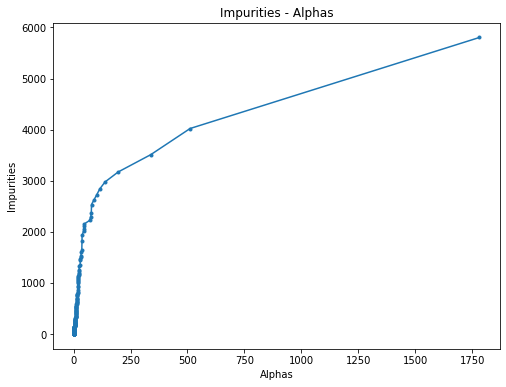

In [42]:
plt.figure(figsize=(8,6))
plt.plot(ccp_alphas, impurities, marker="o", markersize=3)
plt.xlabel("Alphas")
plt.ylabel("Impurities")
plt.title("Impurities - Alphas")
plt.show()

## Train Decision Trees with all alphas returned by the function and get the train mse and test mse

In [43]:
train_mse, test_mse = {}, {}
for alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=alpha)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    mse = mean_squared_error(y_train, y_pred)
    train_mse[alpha] = mse
    y_pred = clf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred) 
    test_mse[alpha] = mse

## Plot train ans test mse's against alphas (y-axis: mse, x-axis: alpha)

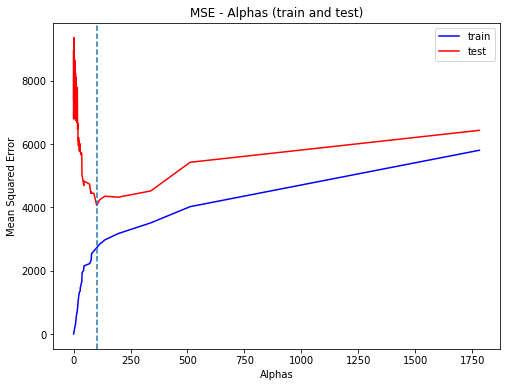

In [47]:
plt.figure(figsize=(8,6))
xx = list(train_mse.keys())
yy = list(train_mse.values())
plt.plot(xx, yy, color='blue', label="train")
xx = list(test_mse.keys())
yy = list(test_mse.values())
plt.plot(xx, yy, color='red', label="test")
plt.axvline(x=min_alpha, linestyle="dashed")
plt.xlabel("Alphas")
plt.ylabel("Mean Squared Error")
plt.title("MSE - Alphas (train and test)")
plt.legend()
plt.show()

## Grab and print the alpha that gives the smallest mse in testing set

In [46]:
min_mse = min(list(test_mse.values()))
min_idx = np.argmin(list(test_mse.values()))
min_alpha = list(test_mse.keys())[min_idx]
print(f"The alpha for which the mse is minimum is: {min_alpha}, and its coresponding mse value is: {test_mse[min_alpha]}")

The alpha for which the mse is minimum is: 101.41074002286234, and its coresponding mse value is: 4063.2750451208635


## Use the best alpha and fit a decsion tree

In [48]:
regressor = DecisionTreeRegressor(ccp_alpha=k, random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=101.41074002286234, random_state=0)

### Get training mse and rsquared 

In [49]:
y_pred = regressor.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"mse: {mse}, re score: {r2}")

mse: 2723.1019426697235, re score: 0.530802187107609


### Get testing mse and rsquared

In [50]:
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}, re score: {r2}")

mse: 4063.2750451208635, re score: 0.3672655578289833


### Plot decision tree using alpha that gives the smallest mse

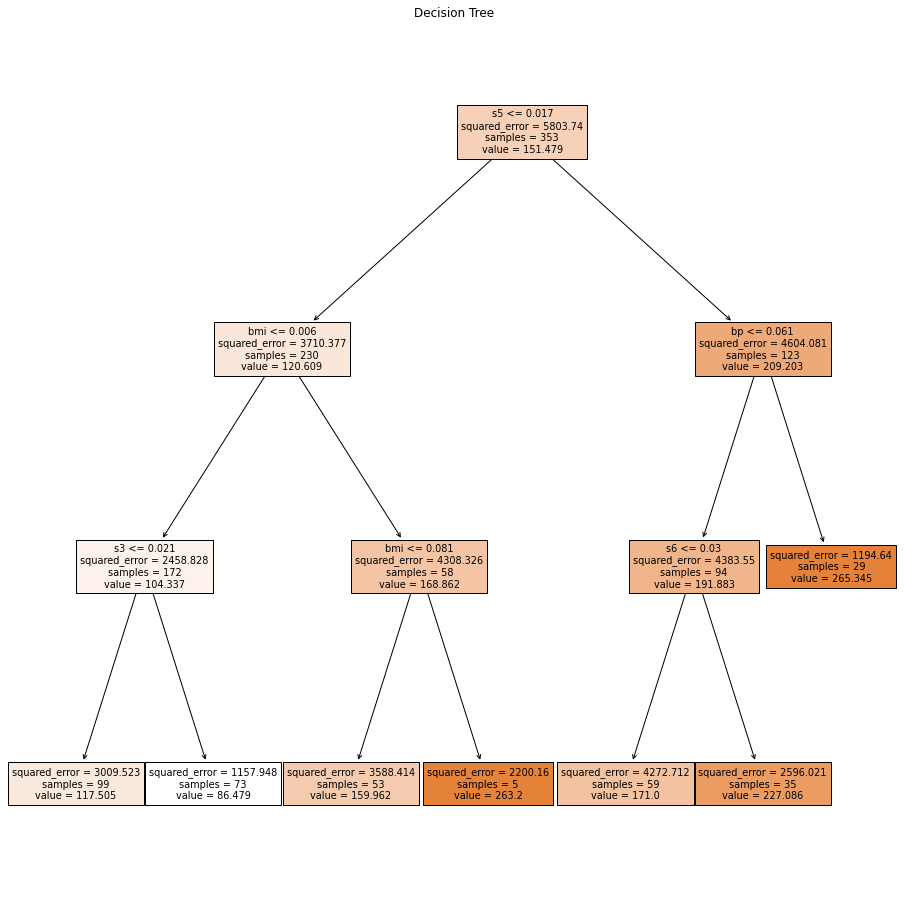

In [54]:
from sklearn.tree import plot_tree 
fig = plt.figure(figsize=(16,16)) 
plot_tree(regressor, filled=True, feature_names=load_diabetes().feature_names) 
plt.title("Decision Tree") 
plt.show()

# Loading Classification Data

In [55]:
from trace import Trace
from sklearn.datasets import load_wine

x = load_wine(as_frame=Trace).data
y = load_wine().target

# Split training and testing data here

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print(len(x_train), len(x_test))

142 36


# KNeighborsClassifier

## No feature scaling
fit Knn Classifier with k=5 Split training and testing data here

In [57]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_log = clf.predict_proba(x_test)

### Get the accuracy and log_loss on the testing set with k=5

In [58]:
from sklearn.metrics import accuracy_score, log_loss

acc = accuracy_score(y_test, y_pred, normalize=True)
log = log_loss(y_test, y_pred_log)

print(f"accuracy: {acc}, and log loss: {log}")

accuracy: 0.6666666666666666, and log loss: 2.349030879737426


### Find the k that gives the lowest log_loss for the problem. (Try k's from 1-40). Print best k found

In [68]:
dict_log = {}
for n in range(1,41):
    clf = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    y_pred = clf.predict_proba(x_test)
    log = log_loss(y_test, y_pred)
    dict_log[n] = log

k = np.argmin(list(dict_log.values()))
print(f"The lowest log loss is: {dict_log[k+1]}, and its coressponding number of neighbors is {k+1}")

The lowest log loss is: 0.6154875239283647, and its coressponding number of neighbors is 22


### Plot testing set log loss as k increases. Plot from k=1 to k=40 (y-axis: testing set log loss, x-axis: k)

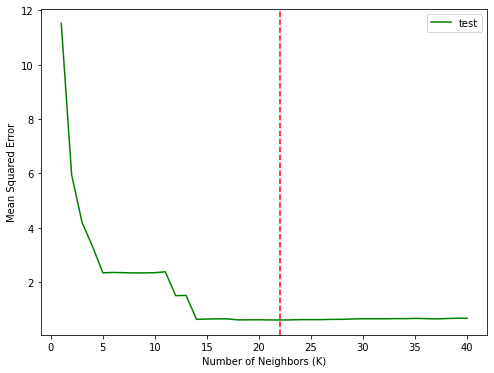

In [69]:
xx = list(dict_log.keys())
yy = list(dict_log.values())

plt.figure(figsize=(8,6))
plt.plot(xx, yy, color='green', label="test")
plt.axvline(x=k+1, color='red', linestyle="dashed")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

### Fit KnnClassifier with best k and get the accuracy and log loss on testing set

In [70]:
clf = KNeighborsClassifier(n_neighbors=k+1).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_log = clf.predict_proba(x_test)
acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"For k=37 as the best number of neighbors, acc is: {acc}, and log loss is: {log}")

For k=37 as the best number of neighbors, acc is: 0.6388888888888888, and log loss is: 0.6154875239283647


## Feature scaling

Fit knnClassifier here with k=5

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)
scl_x_tr = scaler.transform(x_train)
scl_x_ts = scaler.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=5).fit(scl_x_tr, y_train)

### Get the accuracy and log_loss on the testing set with k=5

In [72]:
y_pred = clf.predict(scl_x_ts)
y_pred_log = clf.predict_proba(scl_x_ts)
acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy is: {acc}, and log loss is: {log}")

accuracy is: 0.9444444444444444, and log loss is: 1.0351092239976634


### Find the k that gives the lowest log_loss for the problem. (Try k's from 1-40). Print best k found

In [73]:
dict_log = {}
for n in range(1,41):
    clf = KNeighborsClassifier(n_neighbors=n).fit(scl_x_tr, y_train)
    y_pred = clf.predict_proba(scl_x_ts)
    log = log_loss(y_test, y_pred)
    dict_log[n] = log

k = np.argmin(list(dict_log.values()))
print(f"The lowest log loss is: {dict_log[k+1]}, and its coressponding number of neighbors is {k+1}")

The lowest log loss is: 0.11026184768575119, and its coressponding number of neighbors is 7


### Plot testing set log loss as k increases. Plot from k=1 to k=40 (y-axis: testing set log loss, x-axis: k)

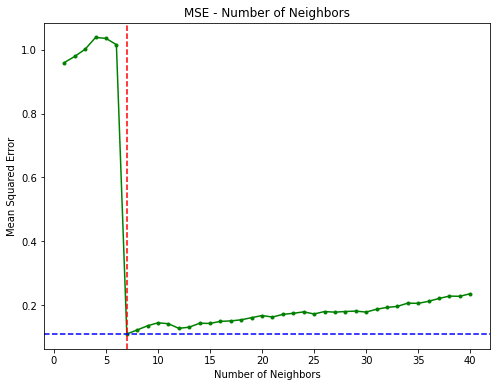

In [77]:
xx = list(dict_log.keys())
yy = list(dict_log.values())

plt.figure(figsize=(8,6))
plt.plot(xx, yy, color='green', label="test", marker="o", markersize=3)
plt.axvline(x=k+1, color='red', linestyle="dashed")
plt.axhline(y=dict_log[k+1], color='blue', linestyle="dashed")
plt.xlabel("Number of Neighbors")
plt.ylabel("Mean Squared Error")
plt.title("MSE - Number of Neighbors")
plt.show()

### Fit KnnClassifier with best k and get the accuracy and log loss on testing set

In [78]:
k = np.argmin(list(dict_log.values())) + 1
clf = KNeighborsClassifier(n_neighbors=k).fit(scl_x_tr, y_train)
y_pred = clf.predict(scl_x_ts)
y_pred_log = clf.predict_proba(scl_x_ts)

acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy is: {acc}, and log loss is: {log}")

accuracy is: 0.9444444444444444, and log loss is: 0.11026184768575119


# DecisionTreeClassifier

Fit Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train) 

## Calculate training log_loss and accuracy

In [80]:
y_pred = clf.predict(x_train)
y_pred_log = clf.predict_proba(x_train)

acc = accuracy_score(y_train, y_pred, normalize=True)
log = log_loss(y_train, y_pred_log)

print(f"accuracy: {acc}, log loss: {log}")

accuracy: 1.0, log loss: 2.1094237467878e-15


## Calculate testing log_loss and accuracy 

In [81]:
y_pred = clf.predict(x_test)
y_pred_log = clf.predict_proba(x_test)

acc = accuracy_score(y_test, y_pred, normalize=True)
log = log_loss(y_test, y_pred_log)

print(f"accuracy: {acc}, log loss: {log}")

accuracy: 0.9166666666666666, log loss: 2.8782313662425585


## Grid search decision tree hyperparameters for prepruning with log loss as the scoring

In [82]:
param_grid = {
    "max_depth" : [3,5,10,15,20,None],
    "min_samples_split" : [2,5,7,10],
    "min_samples_leaf" : [1,2,5]
}

clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(estimator=clf, param_grid=param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=3).fit(x_train, y_train)

### Print best_params, best_score

In [83]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
-0.141548463356974


### Use best estimator from grid search and calculate log_loss and accuracy on the training set

In [84]:
y_pred = grid_cv.predict(x_train)
y_pred_log = grid_cv.predict_proba(x_train)

acc = accuracy_score(y_train, y_pred)
log = log_loss(y_train, y_pred_log)

print(f"accuracy: {acc}, log loss: {log}")  

accuracy: 0.9929577464788732, log loss: 0.009762636345916814


### Use best estimator from grid search and calculate log_loss and accuracy on the testing set

In [85]:
y_pred = grid_cv.predict(x_test)
y_pred_log = grid_cv.predict_proba(x_test)

acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy: {acc}, log loss: {log}")

accuracy: 0.9444444444444444, log loss: 1.9188209108283725


### Show dataframe for all Grid search results

In [86]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007115,0.000589,0.003623,0.000562,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.062500,-0.319149,-0.234043,-0.205230,0.106739,23
1,0.007814,0.002045,0.005707,0.001848,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.062500,-0.319149,-0.297872,-0.226507,0.116295,27
2,0.006265,0.000949,0.005881,0.002854,3,1,7,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.041667,-0.446809,-0.297872,-0.262116,0.167320,45
3,0.005292,0.000811,0.004622,0.000494,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.083333,-0.468085,-0.297872,-0.283097,0.157421,64
4,0.005980,0.000813,0.004136,0.000639,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",-0.083333,-0.276596,-0.234043,-0.197991,0.082915,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.005331,0.003770,0.002666,0.003770,None,2,10,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-0.062500,-0.234043,-0.297872,-0.198138,0.099388,19
68,0.001647,0.002330,0.003626,0.003306,None,5,2,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-0.145833,-0.446809,-0.276596,-0.289746,0.123224,65
69,0.005331,0.003770,0.002670,0.003775,None,5,5,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-0.125000,-0.446809,-0.276596,-0.282801,0.131451,56
70,0.002665,0.003769,0.007064,0.002531,None,5,7,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-0.083333,-0.446809,-0.276596,-0.268913,0.148488,48


## Use cost_complexity_pruning_path function to get alpha's and impurities from the tree

In [87]:
clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train) 
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Plot impurities against alpha's returned by the function (y-axis: impurities, x-axis: alpha)

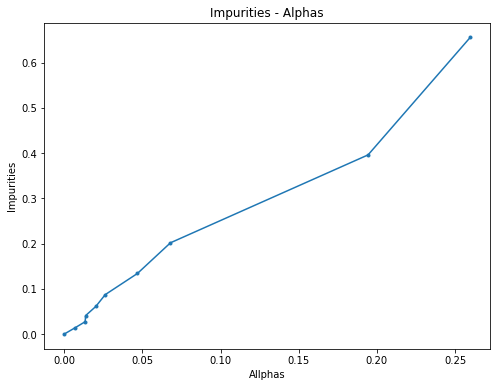

In [91]:
plt.figure(figsize=(8,6))
plt.plot(ccp_alphas, impurities, marker="o", markersize=3)
plt.xlabel("Allphas")
plt.ylabel("Impurities")
plt.title("Impurities - Alphas")
plt.show()

## Train Decision Trees with all alphas returned by the function and get the train log loss and test log loss

In [92]:
train_mse, test_mse = {}, {}
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha).fit(x_train, y_train)
    y_pred = clf.predict_proba(x_train)
    log = log_loss(y_train, y_pred)
    train_mse[alpha] = log
    y_pred = clf.predict_proba(x_test)
    log = log_loss(y_test, y_pred)
    test_mse[alpha] = log

## Plot log loss against alpha's

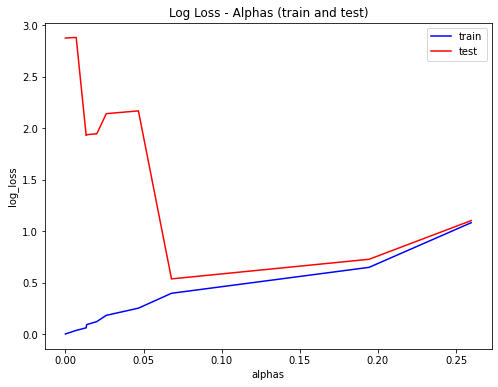

In [93]:
plt.figure(figsize=(8,6))
xx = list(train_mse.keys())
yy = list(train_mse.values())
plt.plot(xx, yy, color='blue', label='train')
xx = list(test_mse.keys())
yy = list(test_mse.values())
plt.plot(xx, yy, color='red', label='test')
plt.xlabel('alphas')
plt.ylabel('log_loss')
plt.title("Log Loss - Alphas (train and test)")
plt.legend()
plt.show()

## Grab and print the alpha that gives the smallest log loss in testing set

In [94]:
min_log = min(list(test_mse.values()))
min_idx = np.argmin(list(test_mse.values()))
min_alpha = list(test_mse.keys())[min_idx]
print(f"Best alpha which results lowest log loss is: {min_alpha}, and its corresponding log loss is: {min_log}.")

Best alpha which results lowest log loss is: 0.06790744466800805, and its corresponding log loss is: 0.5356981709298975.


## Use the best alpha and fit a decsion tree

In [95]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=min_alpha).fit(x_train, y_train)

### Get training log loss and accuracy 

In [96]:
y_pred = clf.predict(x_train)
y_pred_log = clf.predict_proba(x_train)
log = log_loss(y_train, y_pred_log)
acc = accuracy_score(y_train, y_pred, normalize=True)

print(f"accuracy is: {acc}, and log loss is: {log}")

accuracy is: 0.8873239436619719, and log loss is: 0.395725899577319


### Get testing log loss and accuracy

In [97]:
y_pred = clf.predict(x_test)
y_pred_log = clf.predict_proba(x_test)
log = log_loss(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred, normalize=True)

print(f"accuracy is: {acc}, and log loss is: {log}")

accuracy is: 0.8611111111111112, and log loss is: 0.5356981709298975


### Plot decision tree using alpha that gives the smallest log loss

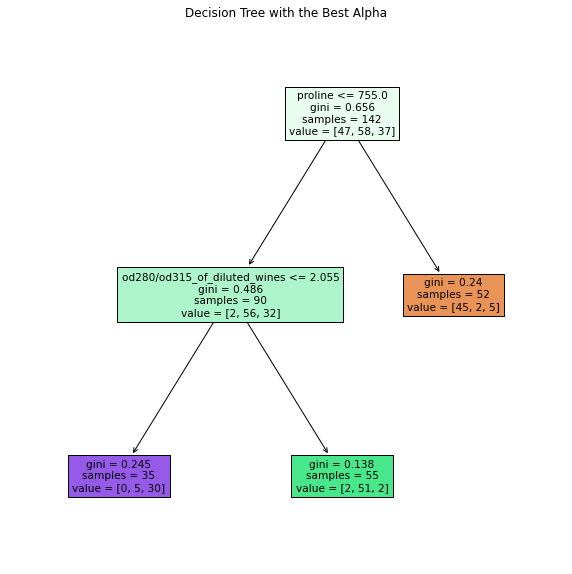

In [98]:
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True,feature_names=load_wine().feature_names)
plt.title("Decision Tree with the Best Alpha")
plt.show()

# Linear Discriminant Analysis
Fit LDA algorithm here

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

clf = LDA()
clf.fit(x_train, y_train)

LinearDiscriminantAnalysis()

## Get log_loss and accuracy on testing set

In [100]:
y_pred = clf.predict(x_test)
y_pred_log = clf.predict_proba(x_test)
acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy is: {acc}, and log loss is {log}")

accuracy is: 1.0, and log loss is 0.003961581393049106


# Quadratic Discriminant analysis

fit QDA algorithm here

In [101]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

## Get log_loss and accuracy on testing set

In [102]:
y_pred = clf.predict(x_test)
y_pred_log = clf.predict_proba(x_test)
acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy is: {acc}, and log loss is {log}")

accuracy is: 0.9722222222222222, and log loss is 0.05738633992016081


# Gaussian Naive Bayes

## No feature scaling
fit Gaussian Naive Bayes without scaling

In [103]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

### Get log_loss and accuracy on testing set

In [104]:
y_pred = gnb.predict(x_test)
y_pred_log = gnb.predict_proba(x_test)
acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy is : {acc}, and log loss is: {log}.")

accuracy is : 0.9722222222222222, and log loss is: 0.08070672994873311.


## Feature scaling (use StandardScaler)

In [105]:
scaler = MinMaxScaler()
scaler.fit(x_train)
scl_x_tr = scaler.transform(x_train)
scl_x_ts = scaler.transform(x_test)

### fit Gaussian Naive Bayes algorithm here using feature scaling

In [106]:
gnb = GaussianNB()
gnb.fit(scl_x_tr, y_train)

GaussianNB()

### Get log_loss and accuracy on testing set with feature scaling

In [107]:
y_pred = gnb.predict(scl_x_ts)
y_pred_log = gnb.predict_proba(scl_x_ts)
acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy is : {acc}, and log loss is: {log}.")

accuracy is : 0.9722222222222222, and log loss is: 0.08023588226887404.


# Multinomial Naive Bayes

## No Feature Scaling
fit Multinomial Naive Bayes algorithm here without feature scaling

In [108]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

### Get log_loss and accuracy on testing set

In [109]:
y_pred = mnb.predict(x_test)
y_pred_log = mnb.predict_proba(x_test)
acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy is : {acc}, and log loss is: {log}.")

accuracy is : 0.7777777777777778, and log loss is: 0.851898641844238.


## Feature scaling (use MinMaxScaler)

In [110]:
scaler = MinMaxScaler()
scaler.fit(x_train)
scl_x_tr = scaler.transform(x_train)
scl_x_ts = scaler.transform(x_test)

### fit Multinomial Naive Bayes algorithm here using feature scaling

In [111]:
mnb = MultinomialNB()
mnb.fit(scl_x_tr, y_train)

MultinomialNB()

### Get log_loss and accuracy on testing set

In [112]:
y_pred = mnb.predict(scl_x_ts)
y_pred_log = mnb.predict_proba(scl_x_ts)
acc = accuracy_score(y_test, y_pred)
log = log_loss(y_test, y_pred_log)

print(f"accuracy is : {acc}, and log loss is: {log}.")

accuracy is : 0.9444444444444444, and log loss is: 0.6292342689793112.
